# Overview
- ブレンディングやってみる

# Import everything I need :)

In [124]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# All function in this notebook

In [2]:
def kaggle_metric(df, preds):
    df["prediction"] = preds
    maes = []
    for t in df.type.unique():
        y_true = df[df.type==t].scalar_coupling_constant.values
        y_pred = df[df.type==t].prediction.values
        mae = np.log(mean_absolute_error(y_true, y_pred))
        maes.append(mae)
    return np.mean(maes)

# Preparation

In [21]:
nb = 67

In [16]:
train = pd.read_csv('./../input/champs-scalar-coupling/train.csv')[['type', 'scalar_coupling_constant']]
type_train = train.type

## my submission, oof data

In [3]:
path_dir = './../output/'

<br>
<br>
score が -1.0 以下のファイルパスを取り出す

In [4]:
output_paths = sorted(glob.glob(path_dir + '*-1.*.csv'))
output_paths

['./../output/nb51_oof_ridge_-1.00907.csv',
 './../output/nb51_submission_ridge_-1.00907.csv',
 './../output/nb53_oof_extra_trees_regressor_-1.18839.csv',
 './../output/nb53_submission_extra_trees_regressor_-1.18839.csv',
 './../output/nb54_oof_random_forest_regressor_-1.45569.csv',
 './../output/nb54_submission_random_forest_regressor_-1.45569.csv',
 './../output/nb56_oof_ridge_-1.36626.csv',
 './../output/nb56_oof_ridge_-1.36800.csv',
 './../output/nb56_submission_ridge_-1.36626.csv',
 './../output/nb56_submission_ridge_-1.36800.csv',
 './../output/nb57_oof_lasso_-1.07263.csv',
 './../output/nb57_submission_lasso_-1.07263.csv',
 './../output/nb60_oof_lgb_-1.2476036248694709.csv',
 './../output/nb60_oof_lgb_-1.5330660525700779.csv',
 './../output/nb60_submission_lgb_-1.2476036248694709.csv',
 './../output/nb60_submission_lgb_-1.5330660525700779.csv',
 './../output/nb63_oof_ridge_-1.05675.csv',
 './../output/nb63_oof_ridge_-1.37017.csv',
 './../output/nb63_submission_ridge_-1.05675.csv

<br>
<br>
oof path list

In [5]:
oof_paths = []
for path in output_paths:
    if 'oof' in path:
        oof_paths.append(path)
        
print(len(oof_paths))
oof_paths

16


['./../output/nb51_oof_ridge_-1.00907.csv',
 './../output/nb53_oof_extra_trees_regressor_-1.18839.csv',
 './../output/nb54_oof_random_forest_regressor_-1.45569.csv',
 './../output/nb56_oof_ridge_-1.36626.csv',
 './../output/nb56_oof_ridge_-1.36800.csv',
 './../output/nb57_oof_lasso_-1.07263.csv',
 './../output/nb60_oof_lgb_-1.2476036248694709.csv',
 './../output/nb60_oof_lgb_-1.5330660525700779.csv',
 './../output/nb63_oof_ridge_-1.05675.csv',
 './../output/nb63_oof_ridge_-1.37017.csv',
 './../output/nb64_oof_lasso_-1.00737.csv',
 './../output/nb66_oof_lgb_-1.1841484573529812.csv',
 './../output/nb66_oof_lgb_-1.2290049024374545.csv',
 './../output/nb66_oof_lgb_-1.2620223396736945.csv',
 './../output/nb66_oof_lgb_-1.2653899219118332.csv',
 './../output/nb66_oof_lgb_-1.2758947194580286.csv']

<br>
<br>
submission path list

In [6]:
sub_paths = []
for path in output_paths:
    if 'submission' in path:
        sub_paths.append(path)
print(len(sub_paths))
sub_paths

17


['./../output/nb51_submission_ridge_-1.00907.csv',
 './../output/nb53_submission_extra_trees_regressor_-1.18839.csv',
 './../output/nb54_submission_random_forest_regressor_-1.45569.csv',
 './../output/nb56_submission_ridge_-1.36626.csv',
 './../output/nb56_submission_ridge_-1.36800.csv',
 './../output/nb57_submission_lasso_-1.07263.csv',
 './../output/nb60_submission_lgb_-1.2476036248694709.csv',
 './../output/nb60_submission_lgb_-1.5330660525700779.csv',
 './../output/nb63_submission_ridge_-1.05675.csv',
 './../output/nb63_submission_ridge_-1.37017.csv',
 './../output/nb64_submission_lasso_-1.00737.csv',
 './../output/nb66_submission_lgb_-1.2012252574493854.csv',
 './../output/nb66_submission_lgb_-1.2274537170402333.csv',
 './../output/nb66_submission_lgb_-1.228644127659678.csv',
 './../output/nb66_submission_lgb_-1.2475799399411476.csv',
 './../output/nb66_submission_lgb_-1.2675944050352421.csv',
 './../output/nb66_submission_lgb_-1.269968062677878.csv']

<br>
<br>
data_paths    

- これらをブレンドする 

In [78]:
data_paths = [
'./../output/nb54_{}_random_forest_regressor_-1.45569.csv',
'./../output/nb57_{}_lasso_-1.07263.csv',
'./../output/nb60_{}_lgb_-1.5330660525700779.csv',
'./../output/nb63_{}_ridge_-1.37017.csv',
]

details = [data_paths[i].split('_{}_')[1] for i in range(len(data_paths))]
details

['random_forest_regressor_-1.45569.csv',
 'lasso_-1.07263.csv',
 'lgb_-1.5330660525700779.csv',
 'ridge_-1.37017.csv']

<br>
<br>
load data

In [81]:
# submission
sub_dfs = []
for i, path in enumerate(data_paths):
    sub_dfs.append(pd.read_csv(path.format('submission')).drop(['id'], axis=1))
    print(f'submission{i}: {path.format("submission")}')
    
print('-'*80)
oof_dfs = []
for i, path in enumerate(data_paths):
    df = pd.read_csv(path.format('oof'))
    oof_dfs.append(df)
    print(f'oof{i}: {path.format("oof")}')

submission0: ./../output/nb54_submission_random_forest_regressor_-1.45569.csv
submission1: ./../output/nb57_submission_lasso_-1.07263.csv
submission2: ./../output/nb60_submission_lgb_-1.5330660525700779.csv
submission3: ./../output/nb63_submission_ridge_-1.37017.csv
--------------------------------------------------------------------------------
oof0: ./../output/nb54_oof_random_forest_regressor_-1.45569.csv
oof1: ./../output/nb57_oof_lasso_-1.07263.csv
oof2: ./../output/nb60_oof_lgb_-1.5330660525700779.csv
oof3: ./../output/nb63_oof_ridge_-1.37017.csv


<br>
<br>
concat

In [82]:
concat_oof = pd.concat(oof_dfs, axis=1)
concat_sub = pd.concat(sub_dfs, axis=1)

# Blending

In [83]:
median_oof = concat_oof.median(axis=1).values
mean_oof = concat_oof.mean(axis=1).values

median_sub = concat_sub.median(axis=1).values
mean_sub = concat_sub.mean(axis=1).values

# score

In [84]:
median_oof = kaggle_metric(train, median_oof)
print(f'median: {median_oof}')

median: -1.4611282492592697


In [85]:
mean_oof = kaggle_metric(train, mean_oof)
print(f'mean: {mean_oof}')

mean: -1.4300632218515297


# analysis each type

In [104]:
types = np.unique(type_train)

In [201]:
result_df = pd.DataFrame({'type': types})
type_scores = []
for i_type, type_ in enumerate(types):
    print(f'\n ----- {type_} -----')
    idx = type_train==type_
    y_true = train['scalar_coupling_constant'][idx]
    
    oof_scores = []
    for i_oof in range(len(oof_dfs)):
        pred = oof_dfs[i_oof][idx]['oof']
        score = np.log(mean_absolute_error(y_true, pred))
        print(f'score: {score} \t {details[i_oof]}')
        oof_scores.append(score)
    type_scores.append(oof_scores)
        
        
    best_idx = np.argmin(oof_scores)
    print(f'---> best score is {details[best_idx]}')
type_scores = np.array(type_scores)
type_scores = pd.DataFrame(type_scores, columns=details)
result_df = pd.concat([result_df, pd.DataFrame(type_scores)], axis=1)
display(result_df)


 ----- 1JHC -----
score: -0.3666289979440921 	 random_forest_regressor_-1.45569.csv
score: -0.29629858862958747 	 lasso_-1.07263.csv
score: -0.4634454006815642 	 lgb_-1.5330660525700779.csv
score: -0.35289388452411236 	 ridge_-1.37017.csv
---> best score is lgb_-1.5330660525700779.csv

 ----- 1JHN -----
score: -0.951987833578046 	 random_forest_regressor_-1.45569.csv
score: -0.84785507949602 	 lasso_-1.07263.csv
score: -1.0762678023505958 	 lgb_-1.5330660525700779.csv
score: -0.941734218824693 	 ridge_-1.37017.csv
---> best score is lgb_-1.5330660525700779.csv

 ----- 2JHC -----
score: -1.3179475990904663 	 random_forest_regressor_-1.45569.csv
score: -0.9091375813685633 	 lasso_-1.07263.csv
score: -1.4628949572695749 	 lgb_-1.5330660525700779.csv
score: -1.1849914285763905 	 ridge_-1.37017.csv
---> best score is lgb_-1.5330660525700779.csv

 ----- 2JHH -----
score: -1.8093836314767306 	 random_forest_regressor_-1.45569.csv
score: -1.542903929347229 	 lasso_-1.07263.csv
score: -1.86072

,type,random_forest_regressor_-1.45569.csv,lasso_-1.07263.csv,lgb_-1.5330660525700779.csv,ridge_-1.37017.csv
0,1JHC,-0.366629,-0.296299,-0.463445,-0.352894
1,1JHN,-0.951988,-0.847855,-1.076268,-0.941734
2,2JHC,-1.317948,-0.909138,-1.462895,-1.184991
3,2JHH,-1.809384,-1.542904,-1.860728,-1.748131
4,2JHN,-1.865490,-1.377377,-1.904276,-1.708937
5,3JHC,-1.290194,-1.158873,-1.445158,-1.226868
6,3JHH,-1.886986,-1.060442,-1.876075,-1.788898
7,3JHN,-2.156889,-1.388190,-2.175682,-2.008891


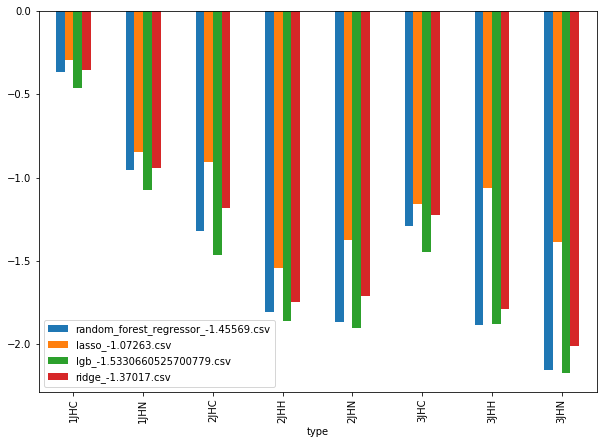

In [202]:
result_df.plot.bar(x='type', figsize=(10,7))